## 로지스틱 회귀 사이트
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# 학습시간 대비 합격 데이터
pass_time = [8,9, 9, 9.5, 10, 12, 14, 14.5, 15, 16, 16, 16.5, 17, 17, 17, 17.5, 20, 20, 20]
fail_time = [1, 2, 2.1,2.6,2.7,2.8,2.9, 3,3.2,3.4,3.5,3.6,3, 5,5.2,5.4]

In [3]:
X = np.hstack( (pass_time, fail_time ))
X

array([ 8. ,  9. ,  9. ,  9.5, 10. , 12. , 14. , 14.5, 15. , 16. , 16. ,
       16.5, 17. , 17. , 17. , 17.5, 20. , 20. , 20. ,  1. ,  2. ,  2.1,
        2.6,  2.7,  2.8,  2.9,  3. ,  3.2,  3.4,  3.5,  3.6,  3. ,  5. ,
        5.2,  5.4])

In [4]:
y1 = [1] * len(pass_time)
y0 = [0] * len(fail_time)
y = np.hstack( (y1, y0) )
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

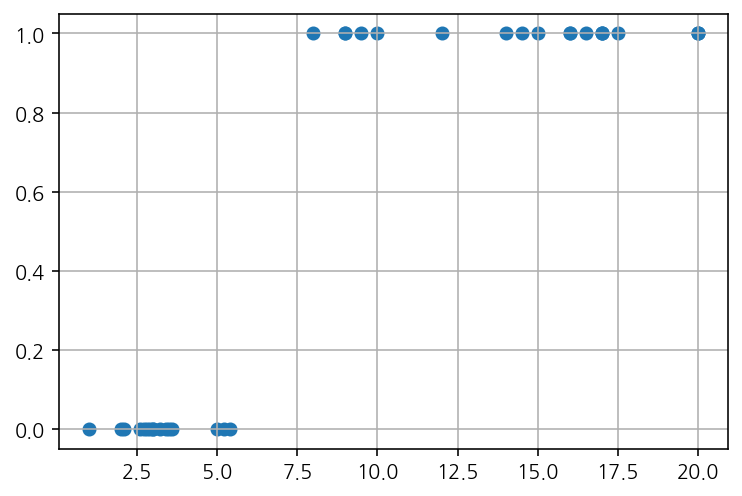

In [5]:
plt.scatter(X, y)
plt.grid()

In [6]:
model = LogisticRegression()
model.fit(X.reshape(-1,1), y)
model.coef_, model.intercept_

(array([[1.32952239]]), array([-9.1854821]))

In [7]:
model.predict( [ [7.0], [6.9] ] )

array([1, 0])

In [8]:
model.predict_proba([ [7.0], [13] ])

array([[4.69743358e-01, 5.30256642e-01],
       [3.03960452e-04, 9.99696040e-01]])

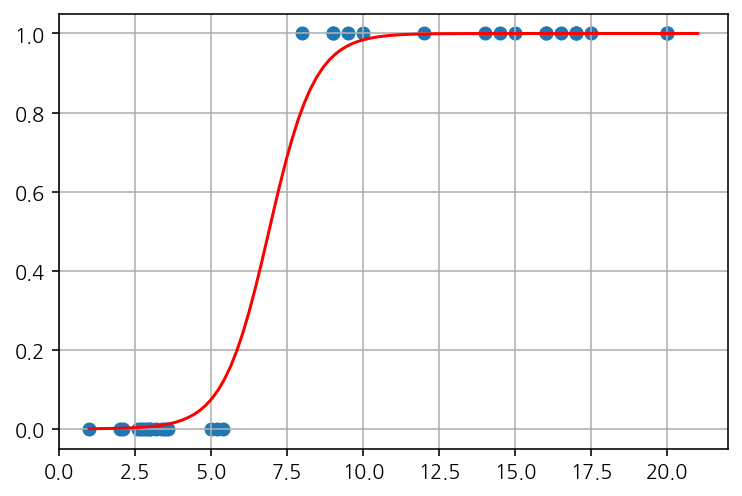

In [9]:
# 모델 시각화
def logreg(z):
    return 1 / (1+ np.exp(-z))

xx = np.linspace(1,21,100)
yy = logreg( model.coef_ * xx + model.intercept_)[0] #2차원이여서 1차원으로


plt.plot(xx, yy, c='r')
plt.scatter(X, y)
plt.grid()

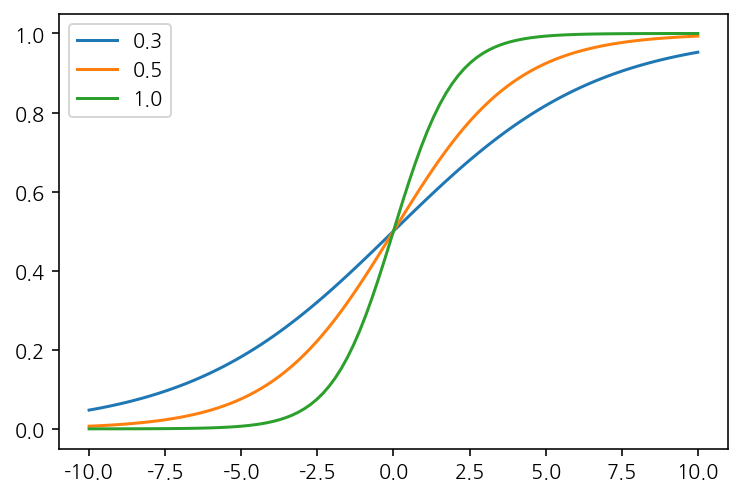

In [10]:
# 가중치의 변화
w_list = [0.3, 0.5, 1.0] #가중치
b_list = [0] #편향 
xx = np.linspace(-10,10,100)
for w in w_list:
    for b in b_list:
        yy = logreg(w*xx +b )
        plt.plot(xx,yy, label=f'{w}')
        
plt.legend()

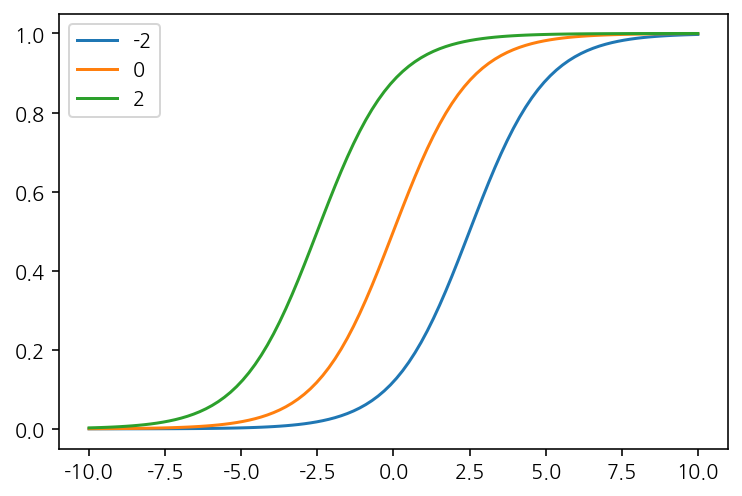

In [11]:
w_list = [0.8] #가중치
b_list = [-2, 0 , 2] #편향 
xx = np.linspace(-10,10,100)
for w in w_list:
    for b in b_list:
        yy = logreg(w*xx +b )
        plt.plot(xx,yy, label=f'{b}')
        
plt.legend()

In [30]:
from mglearn.datasets import make_forge
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from sklearn.linear_model import LogisticRegression
%matplotlib inline

C:\Users\woosung\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


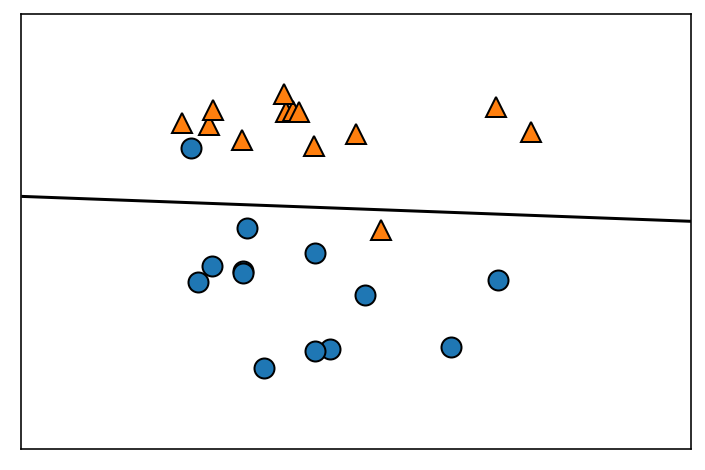

In [50]:
# C는 alpha랑 반대개념 (C가 오를수록 과적합)
X, y = make_forge()
model = LogisticRegression(C=0.01)
model.fit(X, y)

mglearn.plots.plot_2d_separator(model, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)